In [1]:
#checking importing the data
import sys
if sys.version_info[0] < 3:
    raise Exception("Python 3 not detected.")
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from scipy import io
for data_name in ["mnist", "spam", "cifar10"]:
    data = io.loadmat("data/%s_data.mat" % data_name)
    print("\nloaded %s data!" % data_name)
    fields = "test_data", "training_data", "training_labels"
    for field in fields:
        print(field, data[field].shape)


loaded mnist data!
test_data (10000, 784)
training_data (60000, 784)
training_labels (60000, 1)

loaded spam data!
test_data (5857, 32)
training_data (5172, 32)
training_labels (5172, 1)

loaded cifar10 data!
test_data (10000, 3072)
training_data (50000, 3072)
training_labels (50000, 1)


# Problem 1

## Problem 1 a

In [42]:
#MNIST Data
data_mnist=io.loadmat("data/mnist_data.mat")
#indices for training and validating
mnist_all_ind=[x for x in range(60000)]
np.random.seed(10)
mnist_train_ind=np.random.choice(60000, 50000, replace=False)
mnist_valid_ind= [e for e in mnist_all_ind if e not in mnist_train_ind]
data_mnist_train=data_mnist["training_data"][mnist_train_ind]
data_mnist_valid=data_mnist["training_data"][mnist_valid_ind]
label_mnist_train=data_mnist["training_labels"][mnist_train_ind]
label_mnist_valid=data_mnist["training_labels"][mnist_valid_ind]

## Problem 1 b

In [43]:
#SPAM Data
data_spam=io.loadmat("data/spam_data.mat")
#indices for training and validating
spam_all_ind=[x for x in range(5172)]
np.random.seed(11)
spam_train_ind=np.random.choice(5172, 4138, replace=False)                 #4138
spam_valid_ind= [e for e in spam_all_ind if e not in spam_train_ind]     #1034=0.2*5172
data_spam_train=data_spam["training_data"][spam_train_ind]
data_spam_valid=data_spam["training_data"][spam_valid_ind]
label_spam_train=data_spam["training_labels"][spam_train_ind]
label_spam_valid=data_spam["training_labels"][spam_valid_ind]

## Problem 1 c

In [44]:
#cifar10 Data
data_cifar10=io.loadmat("data/cifar10_data.mat")
#indices for training and validating
cifar10_all_ind=[x for x in range(50000)]
np.random.seed(12)
cifar10_train_ind=np.random.choice(50000, 45000, replace=False)                 #5000
cifar10_valid_ind= [e for e in cifar10_all_ind if e not in cifar10_train_ind]     #45000
data_cifar10_train=data_cifar10["training_data"][cifar10_train_ind]
data_cifar10_valid=data_cifar10["training_data"][cifar10_valid_ind]
label_cifar10_train=data_cifar10["training_labels"][cifar10_train_ind]
label_cifar10_valid=data_cifar10["training_labels"][cifar10_valid_ind]

# Problem 2

## Problem 2 a

In [45]:
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC
#mnist
sample_size=[]
accuracy_mnist_valid=[]
accuracy_mnist_train=[]
for size in [100,200,500,1000,2000,5000,10000]:
    sample_size.append(size)
    np.random.seed(13)
    train_ind=np.random.choice(10000, size, replace=False)
    data_mnist_train_sample=data_mnist_train[train_ind]
    label_mnist_train_sample=label_mnist_train[train_ind]
    
    #Build model
    mnist_lsvc = LinearSVC()
    label_mnist_train_sample=np.ravel(label_mnist_train_sample)
    mnist_lsvc.fit(data_mnist_train_sample,label_mnist_train_sample)
    
    
    #Find validation accuracy
    label_mnist_valid_pred=mnist_lsvc.predict(data_mnist_valid)
    accuracy_mnist_valid.append(accuracy_score(label_mnist_valid,label_mnist_valid_pred))
    print(accuracy_mnist_valid)
    
    #Find training accuracy
    label_mnist_train_pred=mnist_lsvc.predict(data_mnist_train_sample)
    accuracy_mnist_train.append(accuracy_score(label_mnist_train_sample,label_mnist_train_pred))
    print(accuracy_mnist_train)

[0.7007]
[1.0]
[0.7007, 0.7715]
[1.0, 1.0]
[0.7007, 0.7715, 0.8076]
[1.0, 1.0, 1.0]


C:\ProgramData\Anaconda2\envs\ipykernel_py3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[0.7007, 0.7715, 0.8076, 0.8234]
[1.0, 1.0, 1.0, 1.0]


C:\ProgramData\Anaconda2\envs\ipykernel_py3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[0.7007, 0.7715, 0.8076, 0.8234, 0.8099]
[1.0, 1.0, 1.0, 1.0, 0.9995]


C:\ProgramData\Anaconda2\envs\ipykernel_py3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[0.7007, 0.7715, 0.8076, 0.8234, 0.8099, 0.8371]
[1.0, 1.0, 1.0, 1.0, 0.9995, 0.9876]
[0.7007, 0.7715, 0.8076, 0.8234, 0.8099, 0.8371, 0.8544]
[1.0, 1.0, 1.0, 1.0, 0.9995, 0.9876, 0.9556]


C:\ProgramData\Anaconda2\envs\ipykernel_py3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


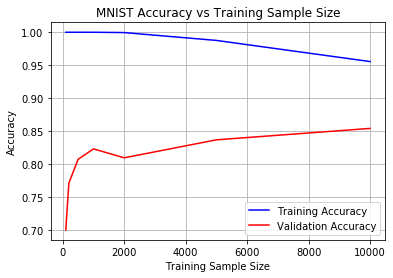

In [48]:
#Plotting Accuracy vs Training Sample Size
size=[100,200,500,1000,2000,5000,10000]
import matplotlib.pyplot as plt
plt.grid(True)
plt.plot(size,accuracy_mnist_train,color="blue")
plt.plot(size,accuracy_mnist_valid,color="red")


plt.title('MNIST Accuracy vs Training Sample Size')
plt.ylabel('Accuracy')
plt.xlabel('Training Sample Size')

#legend
plt.legend(('Training Accuracy', 'Validation Accuracy'), loc='lower right')


## Problem 2 b

In [47]:
#spam
sample_size=[]
accuracy_spam_valid=[]
accuracy_spam_train=[]
for size in [100,200,500,1000,2000,4137]:
    sample_size.append(size)
    np.random.seed(14)
    train_ind=np.random.choice(4137, size, replace=False)
    data_spam_train_sample=data_spam_train[train_ind]
    label_spam_train_sample=label_spam_train[train_ind]
    
    #Building Model
    spam_lsvc = LinearSVC()
    label_spam_train_sample=np.ravel(label_spam_train_sample)
    spam_lsvc.fit(data_spam_train_sample,label_spam_train_sample)
    
    #Find validation accuracy
    label_spam_valid_pred=spam_lsvc.predict(data_spam_valid)
    accuracy_spam_valid.append(accuracy_score(label_spam_valid,label_spam_valid_pred))
    print(accuracy_spam_valid)
    
    #Find training accuracy
    label_spam_train_pred=spam_lsvc.predict(data_spam_train_sample)
    accuracy_spam_train.append(accuracy_score(label_spam_train_sample,label_spam_train_pred))
    print(accuracy_spam_train)

C:\ProgramData\Anaconda2\envs\ipykernel_py3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\ProgramData\Anaconda2\envs\ipykernel_py3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\ProgramData\Anaconda2\envs\ipykernel_py3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\ProgramData\Anaconda2\envs\ipykernel_py3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\ProgramData\Anaconda2\envs\ipykernel_py3\lib\site-packages\sklearn\svm\_b

[0.776595744680851]
[0.89]
[0.776595744680851, 0.7649903288201161]
[0.89, 0.88]
[0.776595744680851, 0.7649903288201161, 0.7727272727272727]
[0.89, 0.88, 0.844]
[0.776595744680851, 0.7649903288201161, 0.7727272727272727, 0.7901353965183753]
[0.89, 0.88, 0.844, 0.805]
[0.776595744680851, 0.7649903288201161, 0.7727272727272727, 0.7901353965183753, 0.804642166344294]
[0.89, 0.88, 0.844, 0.805, 0.8055]
[0.776595744680851, 0.7649903288201161, 0.7727272727272727, 0.7901353965183753, 0.804642166344294, 0.8085106382978723]
[0.89, 0.88, 0.844, 0.805, 0.8055, 0.8102489726855209]


C:\ProgramData\Anaconda2\envs\ipykernel_py3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


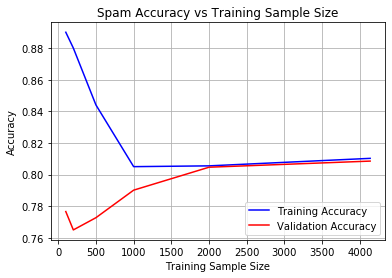

In [49]:
#Plotting Accuracy vs Training Sample Size
size=[100,200,500,1000,2000,4137]
plt.grid(True)
plt.plot(size,accuracy_spam_train,color="blue")
plt.plot(size,accuracy_spam_valid,color="red")


plt.title('Spam Accuracy vs Training Sample Size')
plt.ylabel('Accuracy')
plt.xlabel('Training Sample Size')

#legend
plt.legend(('Training Accuracy', 'Validation Accuracy'), loc='lower right')


## Problem 2 c

In [50]:
from sklearn.svm import SVC
#cifar10
sample_size=[]
accuracy_cifar10_valid=[]
accuracy_cifar10_train=[]
for size in [100,200,500,1000,2000,5000]:
    sample_size.append(size)
    np.random.seed(15)
    train_ind=np.random.choice(45000, size, replace=False)
    data_cifar10_train_sample=data_cifar10_train[train_ind]
    label_cifar10_train_sample=label_cifar10_train[train_ind]
    
    #Building Model
    cifar10_lsvc = SVC(kernel='linear')
    label_cifar10_train_sample=np.ravel(label_cifar10_train_sample)
    cifar10_lsvc.fit(data_cifar10_train_sample,label_cifar10_train_sample)
    
    #Find validation accuracy
    label_cifar10_valid_pred=cifar10_lsvc.predict(data_cifar10_valid)
    accuracy_cifar10_valid.append(accuracy_score(label_cifar10_valid,label_cifar10_valid_pred))
    print(accuracy_cifar10_valid)
    
    #Find training accuracy
    label_cifar10_train_pred=cifar10_lsvc.predict(data_cifar10_train_sample)
    accuracy_cifar10_train.append(accuracy_score(label_cifar10_train_sample,label_cifar10_train_pred))
    print(accuracy_cifar10_train)

[0.2548]
[1.0]
[0.2548, 0.2636]
[1.0, 1.0]
[0.2548, 0.2636, 0.29]
[1.0, 1.0, 1.0]
[0.2548, 0.2636, 0.29, 0.3024]
[1.0, 1.0, 1.0, 1.0]
[0.2548, 0.2636, 0.29, 0.3024, 0.3058]
[1.0, 1.0, 1.0, 1.0, 1.0]
[0.2548, 0.2636, 0.29, 0.3024, 0.3058, 0.298]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


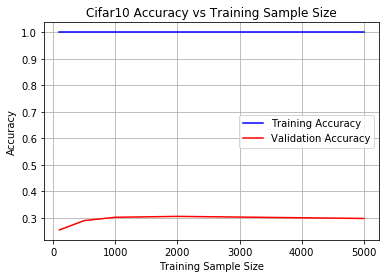

In [53]:
#Plotting Accuracy vs Training Sample Size
size=[100,200,500,1000,2000,5000]
plt.grid(True)
plt.plot(size,accuracy_cifar10_train,color="blue")
plt.plot(size,accuracy_cifar10_valid,color="red")


plt.title('Cifar10 Accuracy vs Training Sample Size')
plt.ylabel('Accuracy')
plt.xlabel('Training Sample Size')

#legend
plt.legend(('Training Accuracy', 'Validation Accuracy'), loc='center right')


# Problem 3

In [57]:
#Selection of C for mnist
selected_C=[]
accuracy_mnist=[]
np.random.seed(16)
train_ind=np.random.choice(50000, 10000, replace=False)
data_mnist_train_sample=data_mnist_train[train_ind]
label_mnist_train_sample=label_mnist_train[train_ind]
for c in [1e-8,1e-7,1e-6,1e-5,1e-4,1e-2,1,10]:
    selected_C.append(c)
    mnist_lsvc = SVC(C=c,kernel='linear')
    label_mnist_train_sample=np.ravel(label_mnist_train_sample)
    mnist_lsvc.fit(data_mnist_train_sample,label_mnist_train_sample)
    label_mnist_pred=mnist_lsvc.predict(data_mnist_valid)
    accuracy_mnist.append(accuracy_score(label_mnist_valid,label_mnist_pred))
    print(accuracy_mnist)

[0.8919]
[0.8919, 0.9205]
[0.8919, 0.9205, 0.9293]
[0.8919, 0.9205, 0.9293, 0.919]
[0.8919, 0.9205, 0.9293, 0.919, 0.9132]
[0.8919, 0.9205, 0.9293, 0.919, 0.9132, 0.9132]
[0.8919, 0.9205, 0.9293, 0.919, 0.9132, 0.9132, 0.9132]
[0.8919, 0.9205, 0.9293, 0.919, 0.9132, 0.9132, 0.9132, 0.9132]


In [58]:
#closer look around 1e-6 which gave us the best accuracy
selected_C=[]
accuracy_mnist1=[]
#np.random.seed(16)
#train_ind=np.random.choice(50000, 10000, replace=False)
#data_mnist_train_sample=data_mnist_train[train_ind]
#label_mnist_train_sample=label_mnist_train[train_ind]
for c in [4e-7,9e-7,8e-6]:
    selected_C.append(c)
    mnist_lsvc = SVC(C=c,kernel='linear')
    label_mnist_train_sample=np.ravel(label_mnist_train_sample)
    mnist_lsvc.fit(data_mnist_train_sample,label_mnist_train_sample)
    label_mnist_pred=mnist_lsvc.predict(data_mnist_valid)
    accuracy_mnist1.append(accuracy_score(label_mnist_valid,label_mnist_pred))
    print(accuracy_mnist1)

[0.9292]
[0.9292, 0.9299]
[0.9292, 0.9299, 0.9214]


# Problem 4

In [61]:
#5 fold cross validation for spam data
import math
np.random.seed(17)
#shuffle data
spam_train_ind_shuf=np.random.choice(5172, 5172, replace=False)
spam_data_train_shuf=data_spam["training_data"][spam_train_ind_shuf]
spam_labels_train_shuf=data_spam["training_labels"][spam_train_ind_shuf]
accuracy_spam=[]
unshuffled_ind=[x for x in range(5172)]
for c in [1e-6,1e-5,1e-4,1e-2,1,10,50,100]:
    accuracy_k_spam=[]
    for k in range(5):
        #validation split
        range_start=k*1034+math.ceil(k/2)
        range_end=1034*(k+1)+math.ceil(k/2)
        kfold_data_valid=spam_data_train_shuf[range_start:range_end]
        kfold_labels_valid=np.ravel(spam_labels_train_shuf[range_start:range_end])   
        #Training data
        kfold_data_train_ind=[e for e in unshuffled_ind if e <range_start or e>range_end]
        kfold_data_train=spam_data_train_shuf[kfold_data_train_ind]
        kfold_labels_train=np.ravel(spam_labels_train_shuf[kfold_data_train_ind])
        #build model
        spam_lsvc = SVC(C=c,kernel='linear')
        spam_lsvc.fit(kfold_data_train,kfold_labels_train)
        label_spam_pred=spam_lsvc.predict(kfold_data_valid)
        #accuracy for that specific fold
        accuracy_k_spam.append(accuracy_score(kfold_labels_valid,label_spam_pred))
    #average accuracy    
    accuracy_spam.append(np.mean(accuracy_k_spam))
    print(accuracy_spam)


[0.7100580270793037]
[0.7100580270793037, 0.7100580270793037]
[0.7100580270793037, 0.7100580270793037, 0.7174081237911024]
[0.7100580270793037, 0.7100580270793037, 0.7174081237911024, 0.778723404255319]
[0.7100580270793037, 0.7100580270793037, 0.7174081237911024, 0.778723404255319, 0.8019342359767891]
[0.7100580270793037, 0.7100580270793037, 0.7174081237911024, 0.778723404255319, 0.8019342359767891, 0.8042553191489363]
[0.7100580270793037, 0.7100580270793037, 0.7174081237911024, 0.778723404255319, 0.8019342359767891, 0.8042553191489363, 0.8021276595744681]
[0.7100580270793037, 0.7100580270793037, 0.7174081237911024, 0.778723404255319, 0.8019342359767891, 0.8042553191489363, 0.8021276595744681, 0.8034816247582205]


# Problem 5

# MNIST

In [66]:
#build model using all data
np.random.seed(18)
data_mnist_full=data_mnist["training_data"]
label_mnist_full=data_mnist["training_labels"]
c=9e-7
mnist_lsvc_full = SVC(C=c,kernel='linear')
label_mnist_full=np.ravel(label_mnist_full)
mnist_lsvc_full.fit(data_mnist_full,label_mnist_full)


SVC(C=9e-07, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [67]:
#predict
data_test_mnist=data_mnist["test_data"]
mnist_full_predict=mnist_lsvc_full.predict(data_test_mnist)

In [74]:
#output
# A code snippet to help you save your results into a kaggle accepted csv
import pandas as pd
import numpy as np

# Usage results_to_csv(clf.predict(X_test))
def results_to_csv_mnist(y_test):
    y_test = y_test.astype(int)
    df = pd.DataFrame({'Category': y_test})
    df.index += 1  # Ensures that the index starts at 1. 
    df.to_csv('mnist_submission.csv', index_label='Id')
results_to_csv_mnist(mnist_full_predict)

## SPAM

In [68]:
#Use Modified Spam Data
data_spam1=io.loadmat("data/spam1_data.mat")

data_spam1_full=data_spam1["training_data"]
label_spam1_full=data_spam1["training_labels"]
label_spam1_full=np.ravel(label_spam1_full)



In [69]:
#build model using all data
c=10
spam_lsvc_full = SVC(C=c,kernel='linear')
spam_lsvc_full.fit(data_spam1_full,label_spam1_full)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [70]:
#predict
data_test_spam1=data_spam1["test_data"]
spam_full_predict=spam_lsvc_full.predict(data_test_spam1)

In [75]:
#output result
# Usage results_to_csv(clf.predict(X_test))
def results_to_csv_spam(y_test):
    y_test = y_test.astype(int)
    df = pd.DataFrame({'Category': y_test})
    df.index += 1  # Ensures that the index starts at 1. 
    df.to_csv('spam_submission.csv', index_label='Id')
results_to_csv_spam(spam_full_predict)

## Cifar10

In [73]:
#cifar10 hyperparameter turning using only 1000 samples for training 
np.random.seed(17)
cifar10_train_ind=np.random.choice(50000, 45000, replace=False)                 #5000
cifar10_valid_ind= [e for e in cifar10_all_ind if e not in cifar10_train_ind]     #45000
data_cifar10_train=data_cifar10["training_data"][cifar10_train_ind]
data_cifar10_valid=data_cifar10["training_data"][cifar10_valid_ind]
label_cifar10_train=data_cifar10["training_labels"][cifar10_train_ind]
label_cifar10_valid=data_cifar10["training_labels"][cifar10_valid_ind]

np.random.seed(18)
# using a sample of only 1000 is enough based on problem 2
train_sample_ind=np.random.choice(45000, 1000, replace=False)

data_cifar10_trian_sample=data_cifar10_train[train_sample_ind]
label_cifar10_train_sample=label_cifar10_train[train_sample_ind]
accuracy_cifar10=[]
for c in [1e-8,1e-5,1e-3,1e-1,1]:
    selected_C.append(c)
    cifar10_lsvc = SVC(C=c,kernel='linear')
    label_cifar10_train_sample=np.ravel(label_cifar10_train_sample)
    cifar10_lsvc.fit(data_cifar10_trian_sample,label_cifar10_train_sample)
    label_cifar10_valid_pred=cifar10_lsvc.predict(data_cifar10_valid)
    accuracy_cifar10.append(accuracy_score(label_cifar10_valid,label_cifar10_valid_pred))
    print(accuracy_cifar10)


[0.2546]
[0.2546, 0.293]
[0.2546, 0.293, 0.292]
[0.2546, 0.293, 0.292, 0.292]
[0.2546, 0.293, 0.292, 0.292, 0.292]


In [76]:
#fitting model with chosen c on all the data
data_cifar10_full=data_cifar10["training_data"]
label_cifar10_full=data_cifar10["training_labels"]
label_cifar10_full=np.ravel(label_cifar10_full)
c=1e-5
cifar10_lsvc_full = SVC(C=c,kernel='linear')
cifar10_lsvc_full.fit(data_cifar10_full,label_cifar10_full)


SVC(C=1e-05, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [79]:
#predict
data_test_cifar10=data_cifar10["test_data"]
cifar10_full_predict=cifar10_lsvc_full.predict(data_test_cifar10)

In [80]:
#output results
# Usage results_to_csv(clf.predict(X_test))
def results_to_csv_cifar10(y_test):
    y_test = y_test.astype(int)
    df = pd.DataFrame({'Category': y_test})
    df.index += 1  # Ensures that the index starts at 1. 
    df.to_csv('cifar10_submission.csv', index_label='Id')
results_to_csv_cifar10(cifar10_full_predict)